# Isolating the soccer field 

> Decreasing the AOI : Area of Interest

## Pipelines

### Pipeline 1 `P_IF_1` -> __`methods.P_IF_1`__

Simple __Vanilla CV__ method for separating green fields. 

```
Pipeline Description 
1. Blur 
2. HSV Filtering 
3. Hue based masking (filtering)
```  
> Works well for given dataset but for some more varied dataset with less color differential between the crowd and the field, would require some pre-processing (increasing the dynamic range//decreasing the filter sens window)


### Pipeline 2 `P_IF_2` -> __`methods.P_IF_2`__

A bit more advanced method using __vanilla CV__ based on color reduction
``` Pipeline 
1. Blur
2. HSV Filtering 
3. Quantization
3. Hue based masking (filtering)

```


> Works better in cases of overcast, 
    
    
### Pipeline 2 `P_IF_2` -> __`methods.P_IF_2`__

Experimental method based on __semantic segmentation using Autoencoders__
    
    

# Imports 

In [1]:
import sys  
import os
from pathlib import Path
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Set Root Directory
root = Path('/Users/flipflops/engineer/soccerEye')
sys.path.insert(0, str(root))

import utils
import methods

from IPython.display import Video
import cv2




In [2]:
# Set Dataset Path
dataset = Path('../dataset/dfl-bl/')
dataset = dataset.resolve()
print(f'Dataset Location : {dataset}')
dataset_files = utils.util_searching_all_files(dataset)[0]
print(f'Number of files in dataset : {len(dataset_files)}')

Dataset Location : /Users/flipflops/engineer/soccerEye/dataset/dfl-bl
Number of files in dataset : 50


# PIPELINE 1 

## Testing on one frame from a random video pick 

### Picking a test image

Video Picked (index) : 18
Total Frames in Video: 750.0


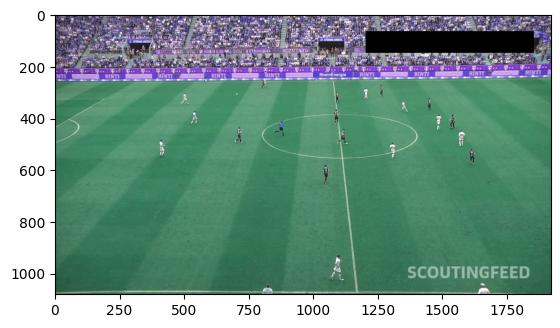

In [3]:
# Picking a Random Video

videoPick = np.random.randint(len(dataset_files))
print(f'Video Picked (index) : {videoPick}')

cap = cv2.VideoCapture(str(dataset_files[videoPick]))

# Picking a Random Frame From Video 

total_frames = cap.get(7)
print(f'Total Frames in Video: {total_frames}')

framePick = np.random.randint(total_frames)

# Display Random Frame 
if framePick < int(total_frames):
    cap.set(1, framePick)
    ret, frame = cap.read()
    imshow(frame)
else:
    print('Frame Number selected larger than max frame')

### Gaussian Blur 

In [4]:
# Blurring at 3 kernel sizes
kernelSizes = [(3, 3), (9, 9), (15, 15),(50,50),(80,80)]
li_bl_fr = []
for (kX, kY) in kernelSizes:
    blurred = cv2.blur(frame, (kX, kY))
    li_bl_fr.append(blurred)


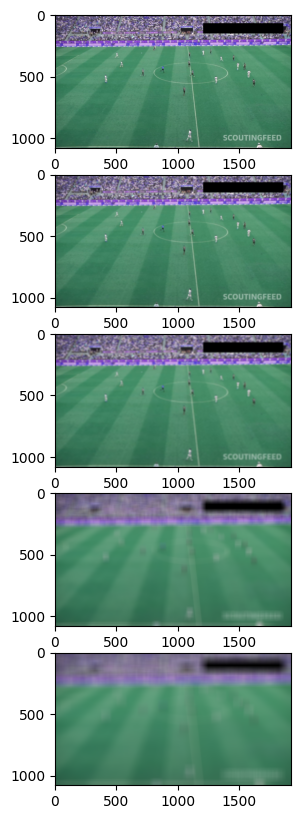

In [5]:
plt.rcParams['figure.figsize'] = [10, 10]

no_plots = len(li_bl_fr)

fig, axs = plt.subplots(no_plots)


for plotno in range(no_plots):
    axs[plotno].imshow(li_bl_fr[plotno])

### Masking

In [6]:
def green_mask(frame,hsv_sens=140):

    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_green = np.array([60 - hsv_sens, 100, 100])
    upper_green = np.array([60 + hsv_sens, 255, 255])

    mask = cv2.inRange(frame_hsv, lower_green, upper_green)
    return mask

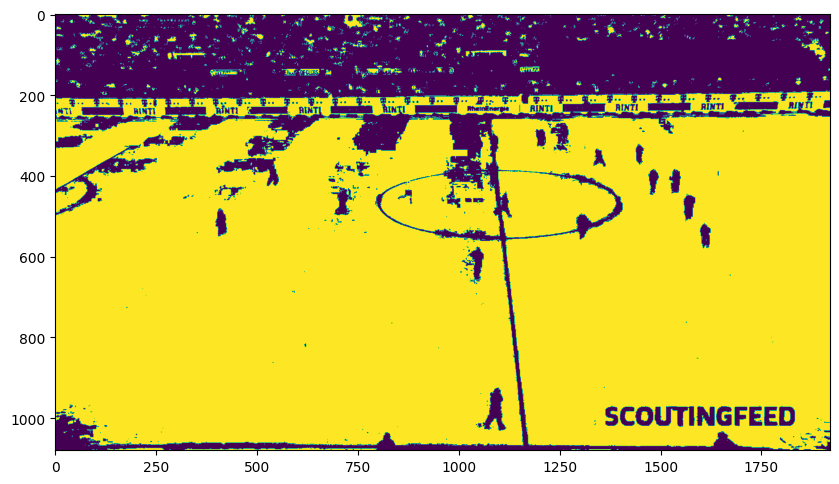

In [7]:
frame_masked = green_mask(frame)
imshow(frame_masked)

### Masking on Blurred Frames 

In [8]:
# Blurring at 3 kernel sizes
kernelSizes = [(3, 3), (9, 9), (15, 15),(50,50),(80,80)]
bl_fr_LI = []
for (kX, kY) in kernelSizes:
    blurred = cv2.blur(frame, (kX, kY))
    bl_fr_LI.append(blurred)
    

In [9]:
mk_bl_fr_LI = []
for blur_frame in bl_fr_LI:
    frame_masked = green_mask(blur_frame)
    mk_bl_fr_LI.append(frame_masked)

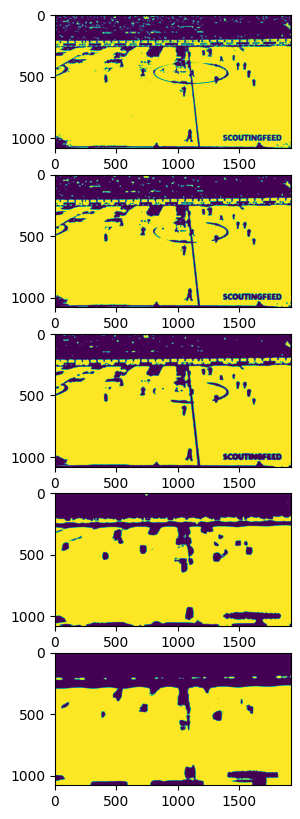

In [10]:
plt.rcParams['figure.figsize'] = [10, 10]

no_plots = len(mk_bl_fr_LI)
fig, axs = plt.subplots(no_plots)
for plotno in range(no_plots):
    axs[plotno].imshow(mk_bl_fr_LI[plotno])

### Creating the Final Pipeline `methods.P_IF_1`

In [11]:
def P_IF_1(frame,kernel_size=80,hsv_sens=140):
    # I = BGR 
    # O = Binary 
    
    blurred = cv2.blur(frame, (kernel_size, kernel_size))
    
    frame_hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    lower_green = np.array([60 - hsv_sens, 100, 100])
    upper_green = np.array([60 + hsv_sens, 255, 255])
    
    mask = cv2.inRange(frame_hsv, lower_green, upper_green)
    return mask
    

-------

# PIPELINE 2 

Video Picked (index) : 34
Total Frames in Video: 750.0


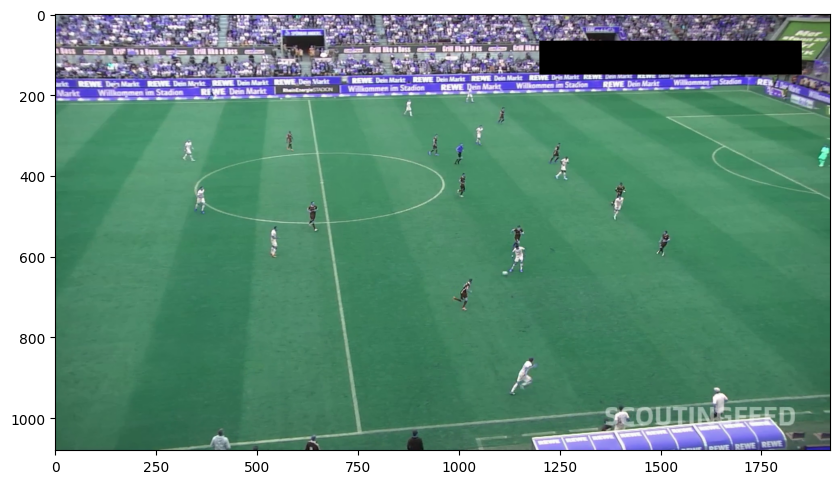

In [12]:
# Picking a Random Video

videoPick = np.random.randint(len(dataset_files))
print(f'Video Picked (index) : {videoPick}')

cap = cv2.VideoCapture(str(dataset_files[videoPick]))

# Picking a Random Frame From Video 

total_frames = cap.get(7)
print(f'Total Frames in Video: {total_frames}')

framePick = np.random.randint(total_frames)

# Display Random Frame 
if framePick < int(total_frames):
    cap.set(1, framePick)
    ret, frame = cap.read()
    imshow(frame)
else:
    print('Frame Number selected larger than max frame')

### Building the pipeline method

In [13]:

from methods import colorQuantize
def P_IF_2(frame,kernel_size=80,hsv_sens=140,quant=100):
    # I = BGR 
    # O = Binary 
    
    blurred = cv2.blur(frame, (kernel_size, kernel_size))
    frame_hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

    lower_green = np.array([60 - hsv_sens, 100, 100])
    upper_green = np.array([60 + hsv_sens, 255, 255])
    
    frame_hsv = colorQuantize(frame_hsv,div=quant)
    
    mask = cv2.inRange(frame_hsv, lower_green, upper_green)
    return mask
    

### Testing

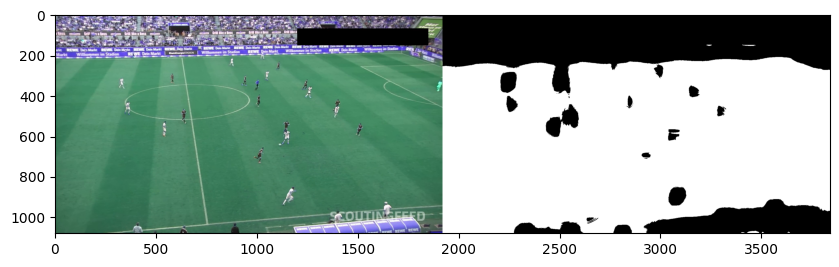

In [14]:
imshow(utils.stackImages([frame,methods.P_IF_2(frame)]))

# References 
- [PIS Blurring](https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/)